<div class='alert alert-block alert-warning'>

<h1 style='font-size: 25px; font-weight: bold'>Task 1 - Context</h1>

<figure>
<img src="resources/trawler.jpg" alt="Trawler image." width="400">
<figcaption> <i>Fig 1.1. Trawler image generated by <a href=https://deepai.org>DeepAi.org</a>.</i></figcaption>
</figure>

<h2 style='font-size: 18px; font-weight: bold'>Scenario: Fish Species Classification</h2>

<p style='text-align: justify'> From this smart fishing trawler company, I was given a project to <b>classify</b> the fishes that are caught by their trawlers.

Their newly installed smart IoT sensors can measure different features of the fishes right after catching them, and label them in a large-scale.

As the *marine data scientist*, with a collected dataset of the specific region, I am here to develop a **classification machine learning model** to predict the species of the fishes caught by the trawler.</p>

<h2 style='font-size: 18px; font-weight: bold'>Values</h2>
<p style='text-align: justify'>A successful machine learning model from this project, can possibly lead to:

1. **Automate** the process of classification, which can make the process efficient with less human intervention to classify the fishes, effectively placing them in separate containers.

2. **Expand** to larger number of fishes' dataset, which could be used for other trawlers that have the sensors equipped.

3. **Prevent** catching younger fishes that need to be released. Once they are classified as juveniles, they will be released as they don't have sales value.</p>

<h2 style='font-size: 18px; font-weight: bold'>Quality Criteria</h2>
<p style='text-align: justify'> The model's performance can be analysed with the following:

1. **F1-Score (macro-averaged)**: There could be minor misclassifications, and macro-averaged F1-Score can help to reduce this tendency.<br>To balance precision and recall, this metric will be useful to ensure that the model performs well in identifying how many predicted fishes of a species are actually correct (precision), and how many fishes of a species were correctly identified (recall).<br>There are several species involved so for such multiclass, it would not be suitable to use F1-Score that deals with binary classification.

2. **Accuracy**: It takes into account that the class distribution is relatively even - it measures the percentage of correct predictions, both true positive and true negatives. It also gives a simple summary of the model performance, as it shows the overall correctness of the model.

</p>

</div>

---

<div class='alert alert-block alert-warning'>

<h1 style='font-size: 25px; font-weight: bold'>Task 2 - The Data</h1>

<h2 style='font-size: 18px; font-weight: bold'>Dataset Reference</h2>
<p>

* Source: https://data.mendeley.com/datasets/bgsx9fjw4d/2
* Publish Date: 25 February 2025
* Authors: Anushka Tonk, SASITHRADEVI A, Vijayalakshmi M
* License: CC BY 4.0
* Purpose: This dataset is used for training a classification model to predict fish species based on physical attributes such as weight, length, height, and width.
</p>

</div>

### Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve, GridSearchCV, cross_validate
from sklearn.preprocessing import PowerTransformer, FunctionTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance

from sklearn.dummy import DummyClassifier

In [2]:
df = pd.read_csv('Fish.csv')
df.head()

,Weight,Length1,Length2,Length3,Height,Width,Species
0,242.0,23.2,25.4,30.0,11.5200,4.0200,Bream
1,290.0,24.0,26.3,31.2,12.4800,4.3056,Bream
2,340.0,23.9,26.5,31.1,12.3778,4.6961,Bream
3,363.0,26.3,29.0,33.5,12.7300,4.4555,Bream
4,430.0,26.5,29.0,34.0,12.4440,5.1340,Bream


### Dataset Overview

| Features | Description |
|----------|----------|
| Weight | The average weight of an individual fish in grams (g). |
| Length | Different lengths of an individual fish in centimetres (cm). <br> 3 lengths are given in this dataset: Length1, Length2, Length3. |
| Height | The average height of an individual fish in centimetres (cm). |
| Width | The average width of an individual fish in centimetres (cm). |
| Species | The species of an individual fish. |

<div class='alert alert-block alert-warning'>

<h2 style='font-size: 18px; font-weight: bold'>Dataset Suitability</h2>
<p style='text-align: justify'> This dataset is well-suited for the task of developing a classification model to predict fish species as it consists of several important physical features used to distinguish between species.

These features reflect the fish’s morphology such as weight, lengths, height, and width.

<figure>
<img src="resources/fish_length.jpg" alt="Measurements of fish length." width="400">
<figcaption> <i>Fig 2.1. Measurements of different fish lengths from <a href=https://www.fsl.orst.edu/geowater/FX3/help/9_Fish_Performance/Measures_of_Fish_Length.htm>
Corvallis Forestry Research Community</a>.</i></figcaption>
</figure>

The 3 lengths in the dataset, at first sight, refer to **(1) standard length** (Length1), **(2) fork length** (Length2), and **(3) total length** (Length3) *(from shortest to longest)*.<br>
This will be checked later again in the EDA stage.

The dataset includes multiple species with representative sample sizes and average measurements for each.<br>This diversity and detailed feature set make the dataset ideal for predictive modeling and species classification tasks.</p>

</div>

---

<div class='alert alert-block alert-warning'>

<h1 style='font-size: 25px; font-weight: bold'>Task 3 – IDA (Initial Data Analysis)</h1>
</div>

In [3]:
df.shape

(7159, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7159 entries, 0 to 7158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   7159 non-null   float64
 1   Length1  7159 non-null   float64
 2   Length2  7159 non-null   float64
 3   Length3  7159 non-null   float64
 4   Height   7159 non-null   float64
 5   Width    7159 non-null   float64
 6   Species  7159 non-null   object 
dtypes: float64(6), object(1)
memory usage: 391.6+ KB


<div class='alert alert-block alert-info'>

<h2 style='font-size: 18px; font-weight: bold'>Dataset Information</h2>

* The dataset consists of **7159 rows** and **7 columns**.

* About the **7 columns**: **6** are of datatype **`float64`** (Weight, Length1, Length2, Length3, Height, Width), **1** is datatype **`object`** (Species).

* No **missing values** were found in this dataset.
</div>

---

<div class='alert alert-block alert-warning'>

<h1 style='font-size: 25px; font-weight: bold'>Task 4 – EDA and Preprocessing</h1>
</div>

In [5]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,7159.000000,7159.000000,7159.000000,7159.000000,7159.000000,7159.000000
mean,442.452424,26.049658,27.972440,44.186604,8.502478,4.762519
std,380.614537,10.978722,11.925595,39.704131,4.056575,1.847965
min,0.000000,7.100000,8.000000,8.000000,1.002400,1.001700
25%,131.000000,18.100000,19.200000,25.050000,6.265850,3.116850
50%,335.000000,25.500000,27.600000,34.400000,8.572800,4.628000
75%,711.000000,32.100000,34.700000,42.900000,10.830000,6.332000
max,1650.000000,59.000000,63.900000,228.800000,19.000000,8.142000


<div class='alert alert-block alert-info'>

<h2 style='font-size: 18px; font-weight: bold'>Lengths' Relationship</h2>

* First, we can see the relationship for lengths, across `mean`, `min`, `25%`, `50%`, `75%` and `max`, that they're increasing in this manner:
* **Length1 < Length2 < Length3**
* Therefore, we can presume that the initial assumption about this relationship respectively:
1. **Length1:** standard length
2. **Length2:** fork length
3. **Length3:** total length
</div>

<div class='alert alert-block alert-info'>

<h2 style='font-size: 18px; font-weight: bold'>Anything Off?</h2>

* From here, we'll clean the data where the `min` weight is `0.0`. Let's take a look at where this data is coming from.
* Standard deviation `std` here shows high variability. This will be considered later for transformation.
* Length3 has a large value for `max` at `228.8`. This will be investigated.
</div>

In [6]:
df[df['Weight'] == 0.0]

,Weight,Length1,Length2,Length3,Height,Width,Species
40,0.0,19.0,20.5,22.8,6.4752,3.3516,Roach
5953,0.0,23.8,30.6,23.4,9.5023,3.9291,Roach
6090,0.0,26.0,20.2,28.7,7.1328,5.8262,Roach


<div class='alert alert-block alert-info'>

* In this context, these are probably roach juveniles that have < 1 gram for their weights.
* However, it still does not make sense to have a `0.0` weight. Therefore, these 3 rows will be removed.
* It seems a bit hard to interpret the data as it is, as these juvenile fishes seem to be quite big in size.
* We'll figure out later if these juvenile fishes (or miscalculated) should be removed.
</div>

In [7]:
# Get indices of rows where weight == 0.0
indices_to_drop = df[df['Weight'] == 0.0].index

# Drop those indices
df_filtered = df.drop(indices_to_drop)
df_filtered.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000
mean,442.637912,26.050964,27.974203,44.194662,8.502813,4.762684
std,380.586456,10.980674,11.927373,39.710466,4.057305,1.848208
min,1.000000,7.100000,8.000000,8.000000,1.002400,1.001700
25%,131.000000,18.100000,19.200000,25.100000,6.264675,3.116025
50%,335.500000,25.500000,27.600000,34.400000,8.573500,4.628400
75%,711.000000,32.100000,34.700000,42.900000,10.830900,6.332250
max,1650.000000,59.000000,63.900000,228.800000,19.000000,8.142000


<div class='alert alert-block alert-info'>

* The `min` weight is still at `1.0` but this value will not be excluded for now, unless we see below if low/high values are anomalies affecting classification.
</div>

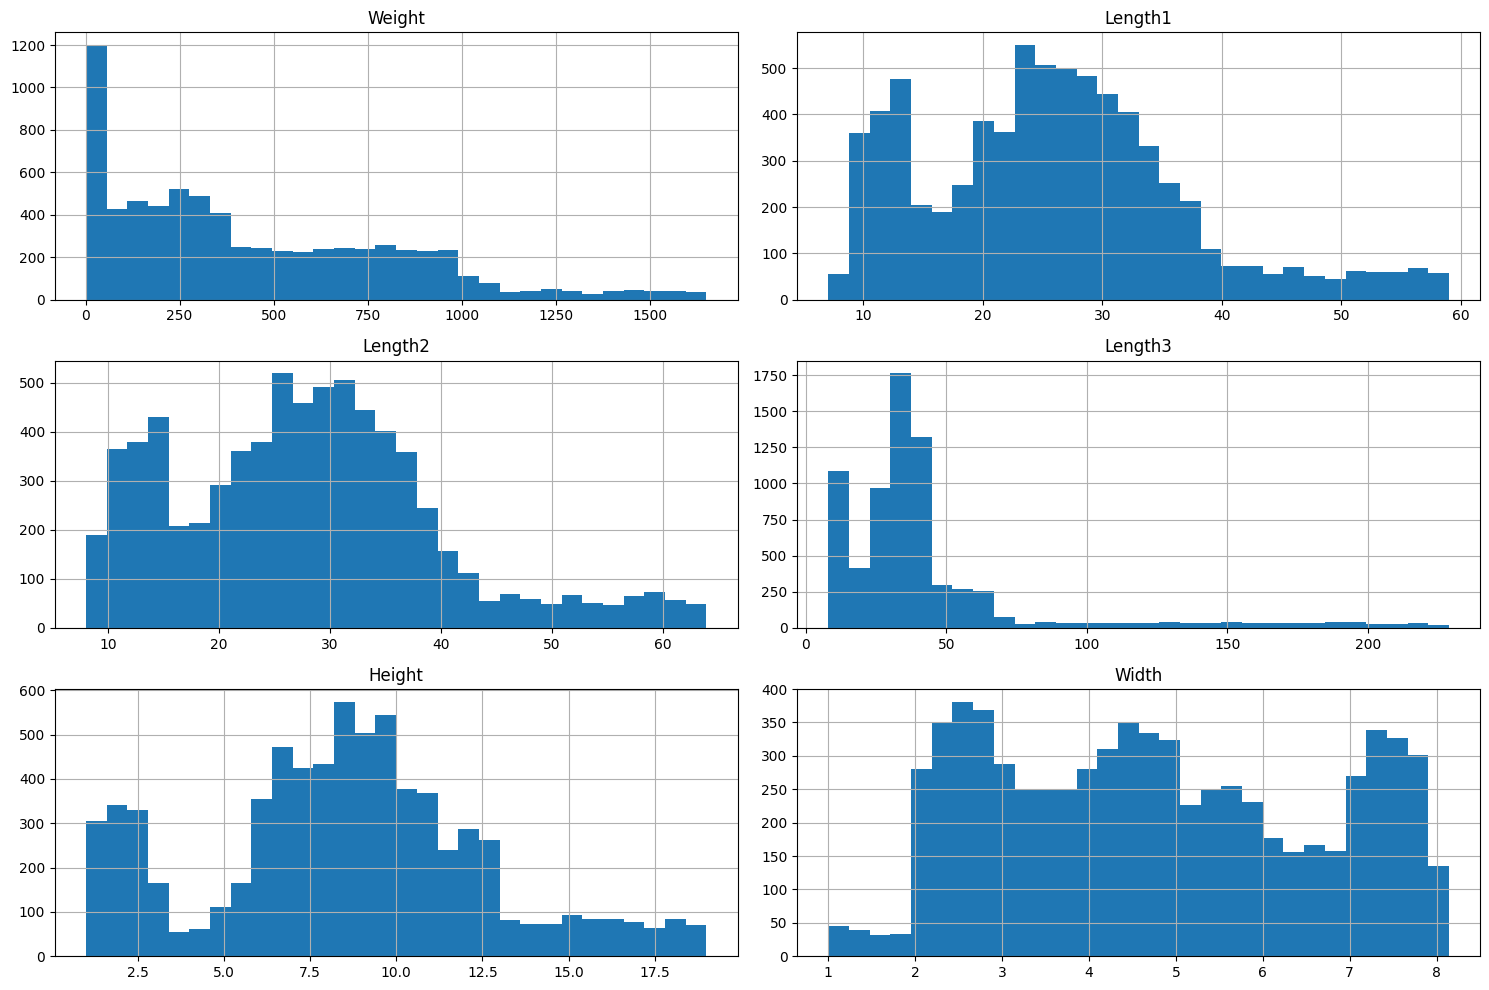

In [8]:
# Select only numerical columns for histogram plotting
columns_numerical = df_filtered.select_dtypes(include=['float64']).columns  
df_filtered[columns_numerical].hist(figsize=(15, 10), bins=30) 
plt.tight_layout() 
plt.show() 

In [9]:
# Skewness of numerical features
skew = df_filtered[columns_numerical].skew() 
print(skew)

Weight     0.884138
Length1    0.649589
Length2    0.629312
Length3    2.695632
Height     0.177515
Width      0.139214
dtype: float64


<div class='alert alert-block alert-info'>
<h2 style='font-size: 18px; font-weight: bold'>Histogram & Skewness Analysis</h2>

* Here we see `Length3` highly right-skewed, and when we checked the description of the dataset, we found out that the `max` was very high.

* This could be a data collection issue for the total length with wrong measurements. <br>There shouldn't be a big difference between fork length (`Length2`) and total length (`Length3`).

* Therefore, this `Length3` will be discarded.

* `Weight`, `Length1` and `Length2` seem to be moderately right-skewed, where `Weight` also has about 1200 counts for first 50 grams, considering that this is the weight threshold for juveniles. <br>These fishes will therefore also be filtered out.

* `Length1` and `Length2` will however be transformed with log transformation to fix the right skew.
</div>

In [10]:
# Remove Length3 column
df_filtered_1 = df_filtered.drop(columns=['Length3'])

# Weight only above > 50 grams
df_filtered_1 = df_filtered_1[df_filtered_1['Weight'] > 50]
df_filtered_1['Species'].value_counts()

Species
Bream        1035
Pike         1017
Parkki       1011
Perch        1009
Whitefish    1006
Roach         898
Name: count, dtype: int64

<div class='alert alert-block alert-info'>
<h2 style='font-size: 18px; font-weight: bold'>What Happened to Smelt?</h2>

<figure>
<img src="resources/smelt.png" alt="My smelt is missing!" width="400">
<figcaption> <i>Fig 2.2. My <a href=https://www.britannica.com/animal/smelt>smelt</a> is missing!</i></figcaption>
</figure>

* Here we see the smelt `Species` missing after the `Weight` was filtered to > 50g. You can see why from the Fig 2.2, it is small in size.

* Since this removes one whole `Species`, it is not accurate to remove them.<br>
Therefore, we'll include the fishes with `Weight` < 50g.
</div>

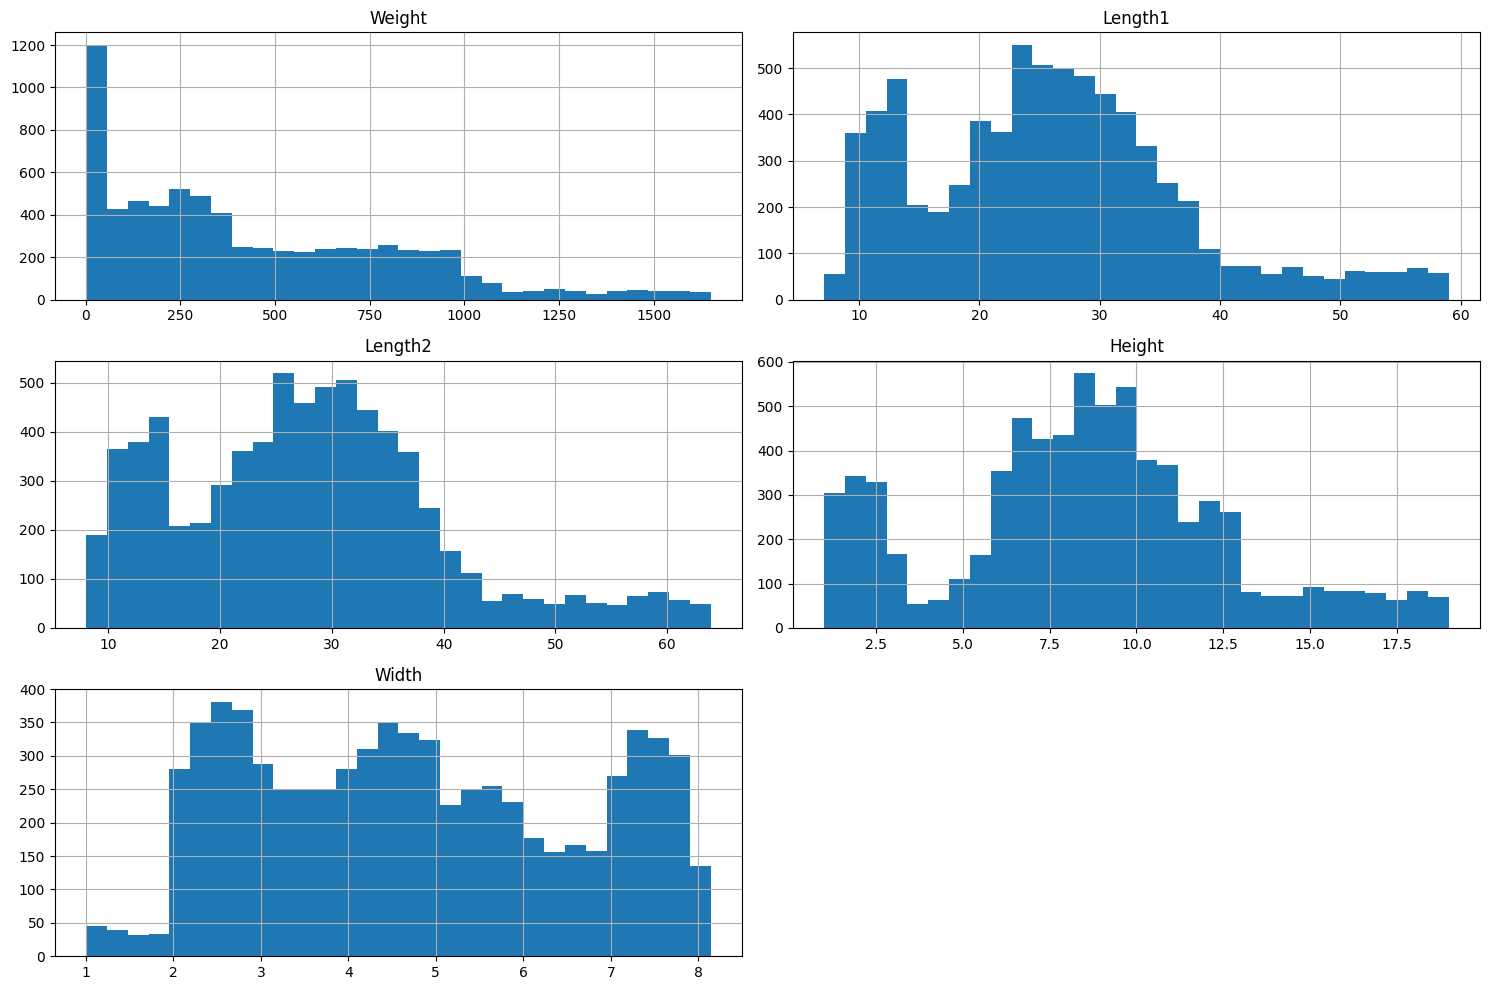

In [11]:
# Remove only Length3 column
df_filtered_new = df_filtered.drop(columns=['Length3'])

# Update numerical columns for histogram plotting
columns_numerical = df_filtered_new.select_dtypes(include=['float64']).columns  
df_filtered_new[columns_numerical].hist(figsize=(15, 10), bins=30) 
plt.tight_layout() 
plt.show() 

In [12]:
# Skewness of numerical features
skew = df_filtered_new[columns_numerical].skew() 
print(skew)

Weight     0.884138
Length1    0.649589
Length2    0.629312
Height     0.177515
Width      0.139214
dtype: float64


<div class='alert alert-block alert-info'>

* With the right skewness for all features except for `Width` and `Height`, we'll transform with log transformation now.
</div>

In [13]:
df_filtered_log = df_filtered_new.copy()

# Apply log transformation to numerical features
df_filtered_log['Weight'] = np.log1p(df_filtered_log['Weight'])
df_filtered_log['Length1'] = np.log1p(df_filtered_log['Length1'])
df_filtered_log['Length2'] = np.log1p(df_filtered_log['Length2'])

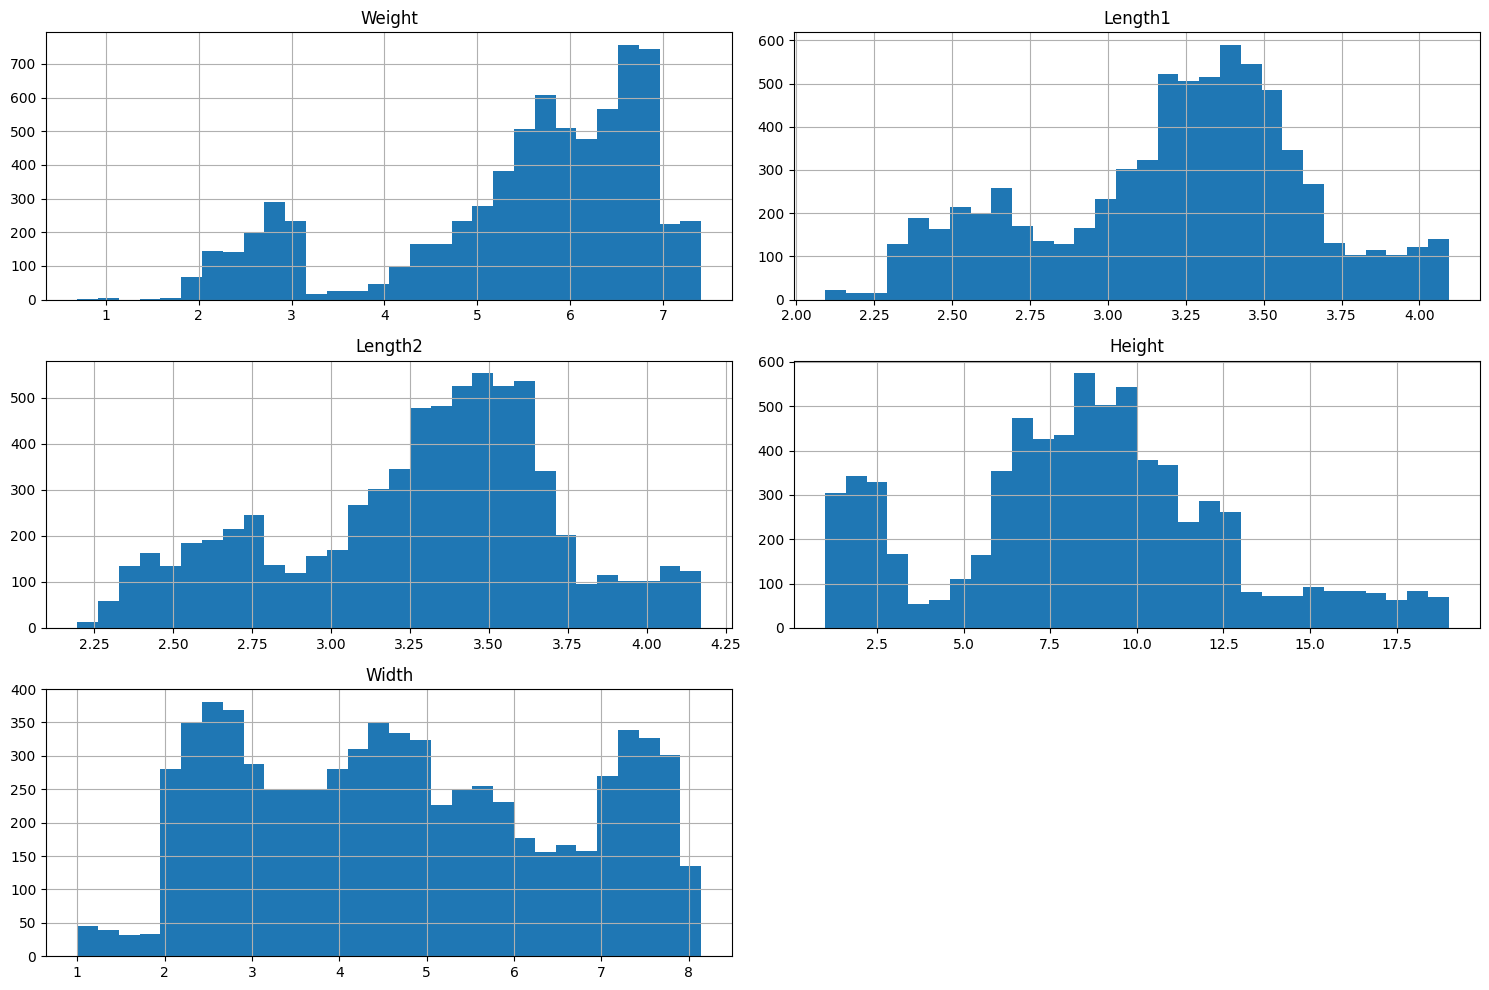

In [14]:
df_filtered_log[columns_numerical].hist(figsize=(15, 10), bins=30) 
plt.tight_layout() 
plt.show() 

In [15]:
# Skewness of numerical features
skew = df_filtered_log[columns_numerical].skew() 
print(skew)

Weight    -1.002523
Length1   -0.355753
Length2   -0.376395
Height     0.177515
Width      0.139214
dtype: float64


<div class='alert alert-block alert-info'>

* `Length1` and `Length2` got better with left skew, but `Weight` now has a worse value.
* We'll apply Yeo-Johnson power transform to see if it helps (applying auto-transformation).
</div>

In [16]:
df_filtered_yj = df_filtered_new.copy()
pt = PowerTransformer(method='yeo-johnson')

df_filtered_yj['Weight'] = pt.fit_transform(df_filtered_yj[['Weight']])
df_filtered_yj['Length1'] = pt.fit_transform(df_filtered_yj[['Length1']])
df_filtered_yj['Length2'] = pt.fit_transform(df_filtered_yj[['Length2']])

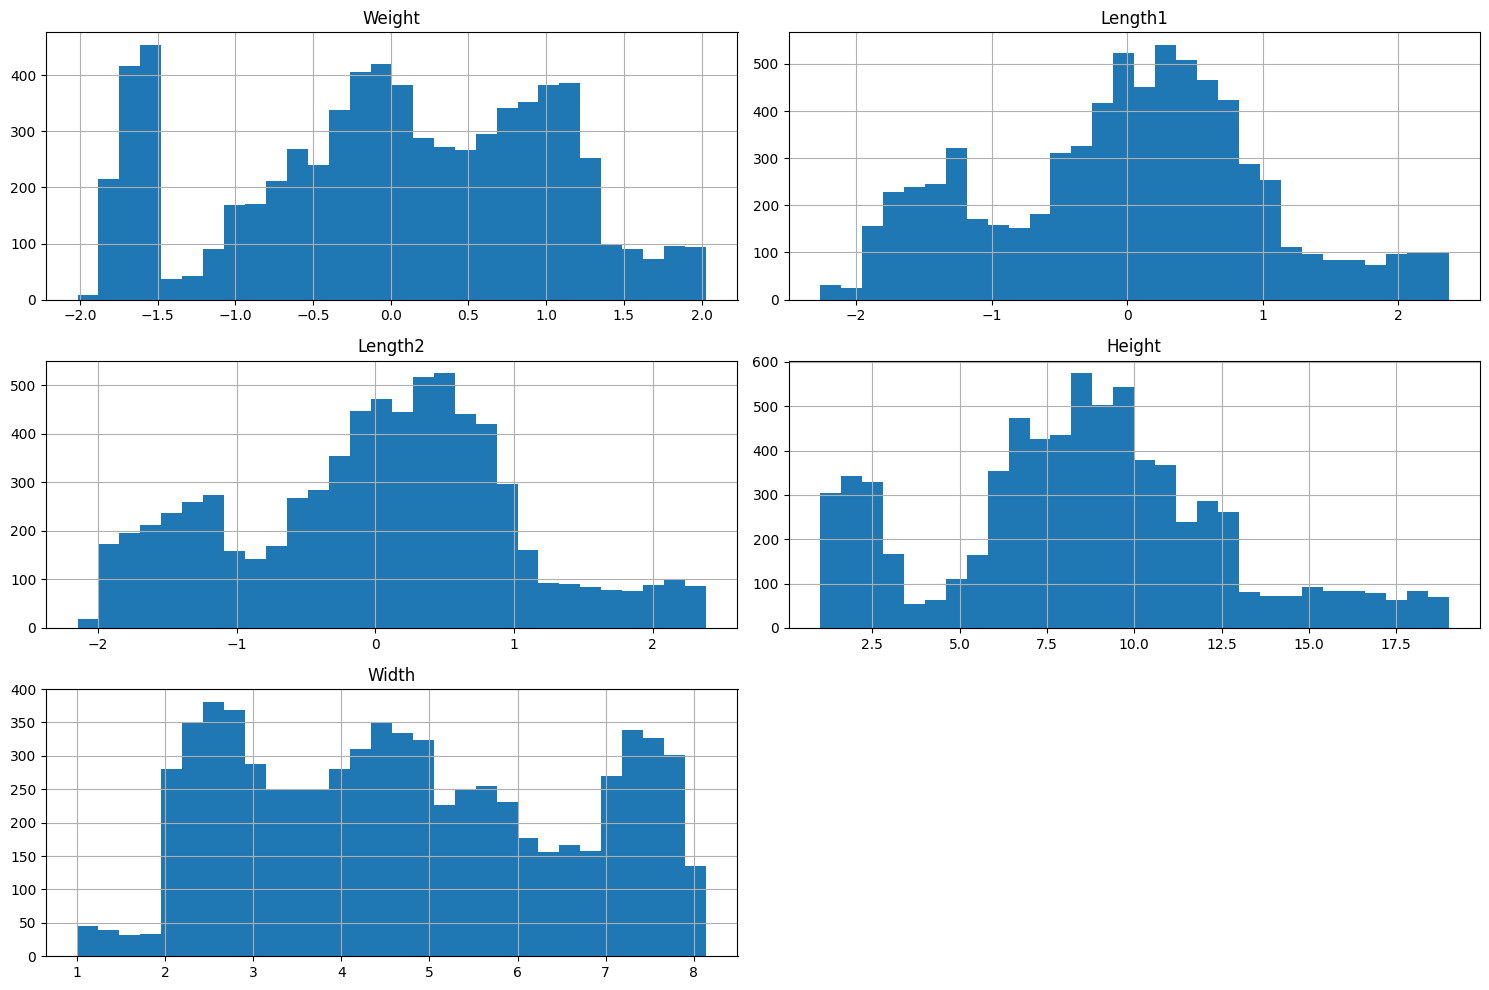

In [17]:
df_filtered_yj[columns_numerical].hist(figsize=(15, 10), bins=30) 
plt.tight_layout() 
plt.show() 

In [18]:
skew = df_filtered_yj[columns_numerical].skew()
print(skew)

Weight    -0.202868
Length1   -0.024150
Length2   -0.027666
Height     0.177515
Width      0.139214
dtype: float64


<div class='alert alert-block alert-info'>

* The skewness is now much better, after the Yeo-Johnson Power transformation.
* We'll proceed with this DataFrame.
</div>

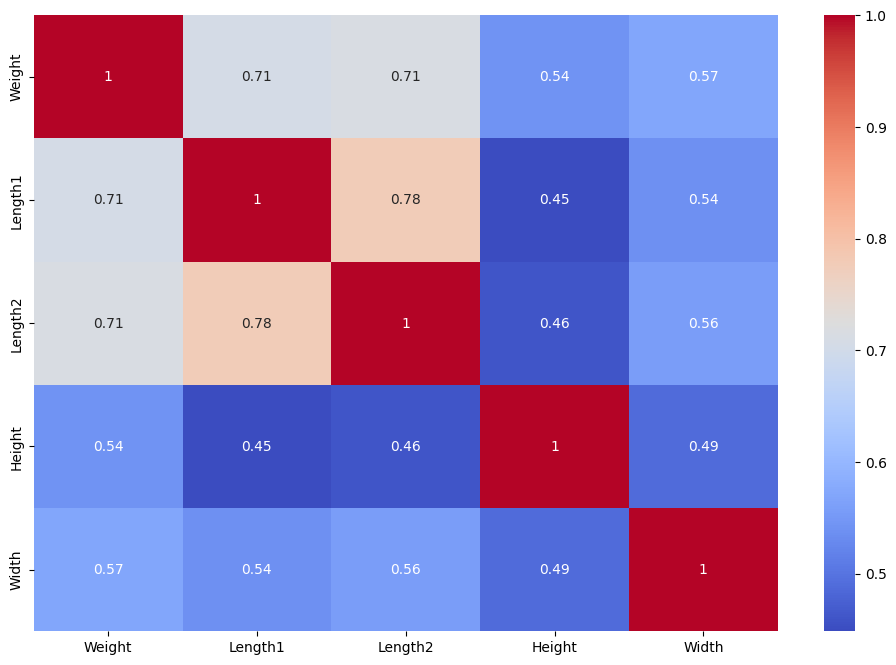

In [19]:
# Correlation matrix of numerical features
corr_mat = df_filtered_yj[columns_numerical].corr() 
plt.figure(figsize=(12, 8)) 
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()

In [20]:
print(corr_mat)

           Weight   Length1   Length2    Height     Width
Weight   1.000000  0.705276  0.714834  0.542212  0.570993
Length1  0.705276  1.000000  0.777623  0.448450  0.537906
Length2  0.714834  0.777623  1.000000  0.461016  0.558290
Height   0.542212  0.448450  0.461016  1.000000  0.488967
Width    0.570993  0.537906  0.558290  0.488967  1.000000


<div class='alert alert-block alert-info'>
<h2 style='font-size: 18px; font-weight: bold'>Correlation Matrix</h2>

* `Length1` and `Length2` show a high correlation at `r=0.78`, which is of course expected as they're inter-related lengths.

* `Weight` has a positive corrleation with `Length1`, `Length2` and `Width`, indicating heavier fish tend to be longer and maybe wider (`r=0.54`).

* `Height` shows the weakest correlation with `Weight` and other features, implying that it may be a less predictive feature.
</div>

In [21]:
# Categorical column analysis - in this case, only 'Species' is categorical
columns_categorical = df_filtered_yj.select_dtypes(include=['object']).columns
for col in columns_categorical: 
    print(df_filtered_yj[col].value_counts())

Species
Perch        1056
Bream        1035
Roach        1017
Pike         1017
Smelt        1014
Parkki       1011
Whitefish    1006
Name: count, dtype: int64


<div class='alert alert-block alert-info'>
<h2 style='font-size: 18px; font-weight: bold'>Categorical Column (Species)</h2>

* The distribution is not changed as there was no transformation in the end.

* Finally, we can use this DataFrame as `df_final`.

</div>

In [22]:
df_final = df_filtered_yj.copy()

In [23]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7156 entries, 0 to 7158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   7156 non-null   float64
 1   Length1  7156 non-null   float64
 2   Length2  7156 non-null   float64
 3   Height   7156 non-null   float64
 4   Width    7156 non-null   float64
 5   Species  7156 non-null   object 
dtypes: float64(5), object(1)
memory usage: 391.3+ KB


<div class='alert alert-block alert-warning'>

<h1 style='font-size: 25px; font-weight: bold'>Task 5 – First Impressions</h1>

</div>

### Baseline $B$

<div class='alert alert-block alert-info'>
<h2 style='font-size: 18px; font-weight: bold'>Splitting DataFrame for Baseline B</h2>

* We'll define the features `X` and target variable `y`.

</div>

In [24]:
# Define feature and target variables
X = df_final.drop(columns=['Species'])  # Features
y = df_final['Species']  # Target variable

In [25]:
# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirm the shapes of X_train, X_test, y_train and y_test
print(f"X_train shape after split: {X_train.shape}")
print(f"X_test shape after split: {X_test.shape}")
print(f"y_train shape after split: {y_train.shape}")
print(f"y_test shape after split: {y_test.shape}")

X_train shape after split: (5724, 5)
X_test shape after split: (1432, 5)
y_train shape after split: (5724,)
y_test shape after split: (1432,)


In [26]:
# Baseline model using DummyClassifier
baseline = DummyClassifier(strategy='stratified', random_state=42)

baseline_f1_macro = cross_val_score(baseline, X_train, y_train, cv=5, scoring='f1_macro') # For multiclass classification, with balanced classes
baseline_acc = cross_val_score(baseline, X_train, y_train, cv=5, scoring='accuracy')

print(f"F1 Macro: {baseline_f1_macro.mean()}")
print(f"Accuracy: {baseline_acc.mean()}")

F1 Macro: 0.14338472897972346
Accuracy: 0.14342947445567533


<div class='alert alert-block alert-info'>
<h2 style='font-size: 18px; font-weight: bold'>Baseline Explanation</h2>

* The stratified dummy classifier achieved an accuracy and macro-averaged F1 score of approximately 0.143, which aligns with random guessing for a balanced 7-class problem (expected chance level = 1/7).
* This confirms that equal F1 macro and accuracy suggest no inherent class imbalance.

</div>

### Two ML Algorithms - $A_1$ and $A_2$ 

<div class='alert alert-block alert-warning'>

Given that fish species classification is a multiclass problem with moderate feature correlations, **A₁: Random Forest** and **A₂: AdaBoost** were selected for the following reasons:

<h2 style='font-size: 18px; font-weight: bold'>A₁: Random Forest</h2>

* **Random forest** is an ensemble method that handles multiclass problems naturally, robust to correlated features (e.g., `Length1` and `Length2`), and provides feature importance insights.
* Its bagging approach reduces overfitting while maintaining high accuracy.  

<h2 style='font-size: 18px; font-weight: bold'>A₂: AdaBoost</h2>

* **AdaBoost** complements Random Forest by focusing on misclassified samples through boosting.
* It can iteratively improve predictions by weighting weak learners (e.g., decision stumps), making it effective for capturing nuanced patterns in morphological measurements like `Weight` and `Height`.

<h2 style='font-size: 18px; font-weight: bold'>Implementation / Further Transformation</h2>

The implementations of A₁ and A₂ in `scikit-learn` will be used in this manner:

**A₁: Random Forest**: `sklearn.ensemble.RandomForestClassifier`

* As an ensemble of deep decision trees, it requires no feature scaling since tree splits are based on value thresholds. The Yeo-Johnson transformation applied during preprocessing remains beneficial, as it normalises skewed distributions (particularly for `Weight` and `Length` measurements), creating more balanced split points during tree construction.
* `scikit-learn` implementation automatically handles both **one-hot encoded categorical variables** and multiclass classification via ensemble voting, while built-in feature randomization ensures robust performance even with correlated features (e.g. `Length1` and `Length2`).

**A₂: AdaBoost**: `sklearn.ensemble.AdaBoostClassifier`

* We can use decision stumps (single-split trees with `max_depth=1`) as base estimators. The default base estimator (`DecisionTreeClassifier(max_depth=1)`) ensures simplicity and avoids overfitting.
* Like Random Forest, it requires no feature scaling due to tree-based operations, though the Yeo-Johnson transformed features improve stump effectiveness by providing more meaningful split thresholds for variables like `Weight`.
* The **SAMME.R algorithm** natively supports **multiclass classification** by updating class probability estimates during each boosting iteration, and while categorical encoding isn't needed, the framework would similarly handle one-hot encoded features through its underlying tree structures.

</div>

<div class='alert alert-success'>
<h2 style='font-size: 18px; font-weight: bold'>Further Transformations Are Not Required!</h2>


* For these cases, further transformations to the dataset are not required, as my choice of algorithms (**A₁: Random Forest** and **A₂: AdaBoost**) effectively address the multiclass classification problem.
* The **Yeo-Johnson transformation** was already applied during EDA to correct skewness in the numerical features.
* No additional preprocessing steps such as **one-hot encoding** or **feature scaling** are necessary, as both selected algorithms are tree-based and inherently robust to unscaled and non-normalised data.


</div>

### Training + Evaluation with Default Parameters

In [27]:
# Define models to evaluate with default parameters
models = {
    "B": DummyClassifier(strategy='stratified', random_state=42),
    "A1": RandomForestClassifier(random_state=42),
    "A2": AdaBoostClassifier(random_state=42)
}

In [28]:
# Train and evaluate each model
results_default = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    results_default.append({"Model": name, "Accuracy": acc, "F1 Macro": f1})

# Display in tabular format
df_results_default = pd.DataFrame(results_default)
df_results_default

,Model,Accuracy,F1 Macro
0,B,0.135475,0.135333
1,A1,0.963687,0.963651
2,A2,0.604050,0.577586


<div class='alert alert-block alert-info'>
<h2 style='font-size: 18px; font-weight: bold'>Train-Test Split Evaluation Summary</h2>

**1) B: Baseline**
* As explained earlier, the stratified dummy classifier performed poorly as expected.
* Accuracy and F1 Macro are both around 13.5%, which is close to random guessing in a 7-class problem.
* This confirms that the classification task is non-trivial and requires a meaningful model.

**2) Random Forest (A₁)**
* It achieved **very high accuracy (96.4%)** and **F1 Macro (96.4%)**.
* This indicates excellent performance on both overall and per-class predictions, suggesting that the model is capturing the structure of the data very well, even with default parameters.
* However, such high performance on a train-test split might indicate **overfitting** (e.g. dataset is small or not representative).

**3) AdaBoost (A₂)**
* Performs moderately well with **60.4% accuracy** and **57.8% F1 Macro**.
* This is significantly better than the baseline, but much lower than Random Forest.
* AdaBoost may be more sensitive to noise or class imbalance, especially with default weak learners (decision stumps).
* It might benefit from hyperparameter tuning or feature engineering.
</div>

### Training + Evaluation with Simple Cross Validation
* Here I used `cv=5` for 5-fold cross validation. 

In [29]:
# This time with cross validation
results_cv = []

for name, model in models.items():
    acc = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    f1 = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
    print(f"{name} - Accuracy: {acc}, F1 Macro: {f1}")
    results_cv.append({
        "Model": name,
        "Accuracy Mean": np.mean(acc),
        "F1 Macro Mean": np.mean(f1)
    })

df_results_cv = pd.DataFrame(results_cv)
df_results_cv

B - Accuracy: [0.14664804 0.14954577 0.1509434  0.1509434  0.1509434 ], F1 Macro: [0.14660325 0.14974478 0.15116049 0.15114563 0.15115516]
A1 - Accuracy: [0.92667598 0.96436059 0.9706499  0.97274633 0.96645702], F1 Macro: [0.9260772  0.96430146 0.97055191 0.97276454 0.96634155]
A2 - Accuracy: [0.64734637 0.51851852 0.62823201 0.42138365 0.639413  ], F1 Macro: [0.63965958 0.4945553  0.59677338 0.38661056 0.59868912]


,Model,Accuracy Mean,F1 Macro Mean
0,B,0.149805,0.149962
1,A1,0.960178,0.960007
2,A2,0.570979,0.543258


<div class='alert alert-block alert-info'>
<h2 style='font-size: 18px; font-weight: bold'>Train-Test Split Evaluation with (Simple) Cross Validation Summary</h2>

**1) Baseline (B)**
* We can see a slight increase (from 0.135 to 0.149) in CV scores, due to averaging over multiple folds, which smooths out randomness.

**2) Random Forest (A₁)**
* Here we see a very consistent performance across both evaluations.
* There is a slight drop in CV scores (from 0.964 to 0.960), that could suggest minimal overfitting.

**3) AdaBoost (A₂)**
* Shows a noticeable drop from train-test to cross-validation:
* Accuracy drops from 0.604 → 0.571, and F1 Macro drops from 0.578 → 0.543
* This suggests mild overfitting or sensitivity to data splits.

∴ AdaBoost may benefit from **hyperparameter tuning** or **more robust base learners**.
</div>

Training scores of A1: [1. 1. 1. 1. 1.]
CV scores of A1: [0.93343909 0.95754833 0.96121675 0.96331282 0.96243961]
Training scores of A2: [0.61881838 0.51102151 0.57918983 0.55417136 0.59213802]
CV scores of A2: [0.60273781 0.50454774 0.57337527 0.54647556 0.58490228]


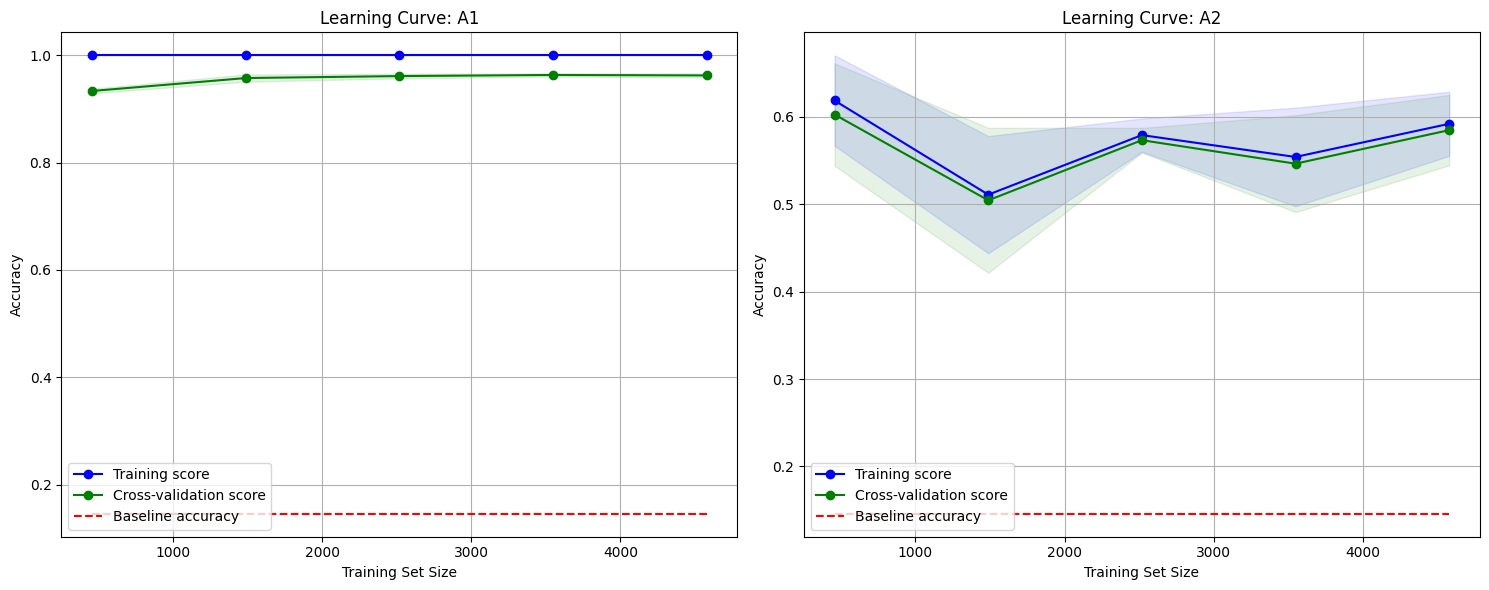

In [30]:
# Assume X_train, y_train are defined
# Compute baseline accuracy
models["B"].fit(X_train, y_train)
baseline_accuracy = models["B"].score(X_train, y_train)

# Create subplots for A1 and A2
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

model_keys = ["A1", "A2"]

for i, key in enumerate(model_keys):
    model = models[key]

    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X_train,
        y=y_train,
        cv=5,
        scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 5),
        shuffle=True,
        random_state=42
    )

    # Mean and std for shading
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot
    axs[i].plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    axs[i].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

    axs[i].plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
    axs[i].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')

    axs[i].hlines(y=baseline_accuracy, xmin=train_sizes[0], xmax=train_sizes[-1], color='red', linestyle='--', label='Baseline accuracy')

    axs[i].set_title(f"Learning Curve: {key}")
    axs[i].set_xlabel("Training Set Size")
    axs[i].set_ylabel("Accuracy")
    axs[i].legend(loc="best")
    axs[i].grid(True)

    # Print the scores for the learning curves
    print(f'Training scores of {key}:', train_mean)
    print(f'CV scores of {key}:', test_mean) 

plt.tight_layout()
plt.show()

<div class='alert alert-block alert-info'>
<h2 style='font-size: 18px; font-weight: bold'>Learning Curve Analysis</h2>

* Here we are purposely excluding baseline, as we discussed about its low scores due to the nature of it being 7-class problem for `Species`.

**1) Random Forest (A₁)**
* Here we see a very consistent performance across both evaluations.
* There is a slight drop in CV scores (from 0.964 to 0.960), that could suggest minimal overfitting.
* Training accuracy remains at **100%**, while cross-validation accuracy stays above 95%, even for small training sizes.
* This reveals a slight overfitting trend: the model fits training data perfectly, but test performance is slightly lower (still excellent).
* Stable results are seen: narrow confidence bands, indicating low variance and consistent generalization.

**2) AdaBoost (A₂)**

* Training and cross-validation scores are significantly lower and less stable.
* Performance fluctuates with training size, showing high variance, especially in cross-validation.
* Broader shaded areas in the curve indicate unstable results. The model is likely **underfitting** for small datasets but improves with more data.

**Overfitting**

* A₁ shows signs of overfitting (perfect training accuracy), but generalisation remains strong, so it's not harmful in this case.
* A₂ does not overfit but rather underfits in some cases, indicating it struggles to capture patterns effectively with the current setup.

**Quality of Results**

* A₁ outperforms all other models in both accuracy and F1 macro.
* A₂ performs better than baseline, but is far from reliable.

**Stability**

* A₁ is highly stable across folds and training sizes.
* A₂ shows instability, suggesting it might benefit from hyperparameter tuning or ensemble boosting depth adjustments.
</div>

<div class='alert alert-block alert-warning'>

<h1 style='font-size: 25px; font-weight: bold'>Task 6 – Hyperparameter Optimization – Nested Cross Validation</h1>

</div>

<div class='alert alert-block alert-info'>
<h2 style='font-size: 18px; font-weight: bold'>Hyperparameter Grids</h2>

**A1: Random Forest**

1) `n_estimators`
* Number of trees in the forest. The higher it is, the better performance, but slower training.
* Typically ranged at 100-500, but I chose 100-200.

2) `max_depth`
* Maximum depth of each tree. `None` = nodes expand until pure (risk overfitting), `20` = prevents overly complex trees

3) `min_samples_split`
* Minimum samples required to split a node. `2` = default (splits even with 2 samples), `5` = more conservative (reduces overfitting).
* Higher values create simpler trees

**A2: AdaBoost**
1) `estimator__max_depth`
* Depth of each weak learner (DecisionTree). `1` = decision stumps (default), `2-3` = slightly stronger learners
* Higher values risk overfitting

2) `n_estimators`
* Number of boosting iterations.
* Too high may overfit (especially with high learning rate)

3) `learning_rate`
* Shrinks contribution of each tree.
* `0.01` = slow, careful learning, `0.1` = default balance.
* Lower values require more estimators
</div>

In [31]:
a1_grid = {
    'clf__n_estimators': [100, 150, 200],
    'clf__max_depth': [20, None],
    'clf__min_samples_split': [2, 5]
}

a2_grid = {
    'clf__estimator__max_depth': [1, 2, 3],
    'clf__n_estimators': [50, 100, 200],
    'clf__learning_rate': [0.01, 0.1]
}

* Since preprocessing was not required on these tree-based methods, this step will be skipped in the pipeline.
* `DecisionTreeClassifier()` is used here, as the base estimator used for A2 is by default `DecisionTreeClassifer` but it must be defined in the pipeline for `max_depth` to be configured.

In [32]:
pipe_a1 = Pipeline([
    ('clf', RandomForestClassifier(random_state=42))
])

pipe_a2 = Pipeline([
    ('clf', AdaBoostClassifier(
        estimator=DecisionTreeClassifier(),  # Explicit base estimator
        random_state=42
    ))
])

pipe_b = Pipeline([
    ('clf', DummyClassifier(strategy='stratified', random_state=42))
])

In [33]:
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': make_scorer(f1_score, average='macro')
}

### A1: Random Forest

In [34]:
grid_search_a1 = GridSearchCV(
    estimator=pipe_a1,
    param_grid=a1_grid,
    scoring=scoring,
    cv=3,
    n_jobs=-1,
    refit='accuracy'  # Refit best model on accuracy, can change to 'f1_macro' if needed
)

# Use cross_validate for cleaner implementation
results_a1 = cross_validate(
    grid_search_a1,
    X_train,
    y_train,
    cv=outer_cv,
    scoring=scoring,
    return_train_score=True,
    return_estimator=True,
    n_jobs=-1,
)

# Extract results
best_params_a1 = [est.best_params_ for est in results_a1['estimator']]
test_accuracy_a1 = results_a1['test_accuracy']
test_f1_a1 = results_a1['test_f1_macro']
train_accuracy_a1 = results_a1['train_accuracy']
train_f1_a1 = results_a1['train_f1_macro']

print(f"Average Train Accuracy: {np.mean(train_accuracy_a1)}")
print(f"Average Train F1 Macro: {np.mean(train_f1_a1)}")
print(f"Average Test Accuracy: {np.mean(test_accuracy_a1)}")
print(f"Average Test F1 Macro: {np.mean(test_f1_a1)}")

# Print best params from each fold
print("\nBest hyperparameters per fold:")
for i, params in enumerate(best_params_a1, 1):
    print(f"Fold {i}: {params}")

Average Train Accuracy: 0.9986460021114049
Average Train F1 Macro: 0.9986535791188518
Average Test Accuracy: 0.9648853330076037
Average Test F1 Macro: 0.9648834374080678

Best hyperparameters per fold:
Fold 1: {'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Fold 2: {'clf__max_depth': 20, 'clf__min_samples_split': 2, 'clf__n_estimators': 150}
Fold 3: {'clf__max_depth': 20, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
Fold 4: {'clf__max_depth': None, 'clf__min_samples_split': 5, 'clf__n_estimators': 150}
Fold 5: {'clf__max_depth': 20, 'clf__min_samples_split': 2, 'clf__n_estimators': 150}


<div class='alert alert-block alert-info'>
<h2 style='font-size: 18px; font-weight: bold'>A1: Hyperparameters Choice</h2>

* **Performance**: Excellent test metrics (~96.4% accuracy/F1) across all folds
* We'll check again with the test values per fold and determine the best hyperparameters.

</div>

In [35]:
fold_results_a1 = []
for i, estimator in enumerate(results_a1['estimator']):
    fold_results_a1.append({
        'fold': i+1,
        'params': estimator.best_params_,
        'test_accuracy': results_a1['test_accuracy'][i],
        'test_f1': results_a1['test_f1_macro'][i]
    })

df_results = pd.DataFrame(fold_results_a1)
df_results.sort_values('test_accuracy', ascending=False)

,fold,params,test_accuracy,test_f1
2,3,"{'clf__max_depth': 20, 'clf__min_samples_split...",0.972926,0.972852
4,5,"{'clf__max_depth': 20, 'clf__min_samples_split...",0.968531,0.968557
1,2,"{'clf__max_depth': 20, 'clf__min_samples_split...",0.966812,0.966769
3,4,"{'clf__max_depth': None, 'clf__min_samples_spl...",0.959825,0.959859
0,1,"{'clf__max_depth': None, 'clf__min_samples_spl...",0.956332,0.956380


<div class='alert alert-block alert-info'>

Here we see that the accuracy and F1-macro scores were the highest at:
* `max_depth`: 20
* `min_samples_split`: 2
* `n_estimators`: 200

We'll go ahead with these hyperparameters for **A1**.

</div>

### A2: AdaBoost

In [36]:
grid_search_a2 = GridSearchCV(
    estimator=pipe_a2,
    param_grid=a2_grid,
    scoring=scoring,
    cv=3,
    n_jobs=-1,
    refit="accuracy" 
)
# Use cross_validate for cleaner implementation
results_a2 = cross_validate(
    grid_search_a2,
    X_train,
    y_train,
    cv=outer_cv,
    scoring=scoring,
    return_train_score=True,
    return_estimator=True,
    n_jobs=-1,
)

# Extract results
best_params_a2 = [est.best_params_ for est in results_a2['estimator']]
test_accuracy_a2 = results_a2['test_accuracy']
test_f1_a2 = results_a2['test_f1_macro']
train_accuracy_a2 = results_a2['train_accuracy']
train_f1_a2 = results_a2['train_f1_macro']

print(f"Average Train Accuracy: {np.mean(train_accuracy_a2)}")
print(f"Average Train F1 Macro: {np.mean(train_f1_a2)}")
print(f"Average Test Accuracy: {np.mean(test_accuracy_a2)}")
print(f"Average Test F1 Macro: {np.mean(test_f1_a2)}")

# Print best params from each fold
print("\nBest hyperparameters per fold:")
for i, params in enumerate(best_params_a2, 1):
    print(f"Fold {i}: {params}")

Average Train Accuracy: 0.958770283170464
Average Train F1 Macro: 0.9586278174953685
Average Test Accuracy: 0.9500360338351606
Average Test F1 Macro: 0.949900000216808

Best hyperparameters per fold:
Fold 1: {'clf__estimator__max_depth': 3, 'clf__learning_rate': 0.1, 'clf__n_estimators': 200}
Fold 2: {'clf__estimator__max_depth': 3, 'clf__learning_rate': 0.1, 'clf__n_estimators': 200}
Fold 3: {'clf__estimator__max_depth': 3, 'clf__learning_rate': 0.1, 'clf__n_estimators': 200}
Fold 4: {'clf__estimator__max_depth': 3, 'clf__learning_rate': 0.1, 'clf__n_estimators': 200}
Fold 5: {'clf__estimator__max_depth': 3, 'clf__learning_rate': 0.1, 'clf__n_estimators': 200}


<div class='alert alert-block alert-info'>
<h2 style='font-size: 18px; font-weight: bold'>A2: Hyperparameters Choice</h2>

* **Performance**: Excellent test metrics again, which indiciates minimal overfitting and balanced class performance as shown in F1 Macro score.
* **Hyperparameters per fold**: All the folds were chosne with the same hyperparameters.
* This means that these parameters are **robust** for the fish dataset.
* The model prefers more complex weak learners than default stumps (`depth=1`), benefitting from slightly more expressive base models.

Therefore, we'll just go ahead with these parameters, we don't have to check each fold:
* `max_depth`: 3
* `learning_rate`: 0.1
* `n_estimators`: 200
</div>

In [37]:
grid_search_b = GridSearchCV(
    estimator=pipe_b,
    param_grid={}, # not needed for DummyClassifier
    scoring=scoring,
    cv=3,
    n_jobs=-1,
    refit="accuracy" 
)
# Use cross_validate for cleaner implementation
results_b = cross_validate(
    grid_search_b,
    X_train,
    y_train,
    cv=outer_cv,
    scoring=scoring,
    return_train_score=True,
    return_estimator=True,
    n_jobs=-1,
)

# Extract results
best_params_b = [est.best_params_ for est in results_b['estimator']]
test_accuracy_b = results_b['test_accuracy']
test_f1_b = results_b['test_f1_macro']
train_accuracy_b = results_b['train_accuracy']
train_f1_b = results_b['train_f1_macro']

print(f"Average Train Accuracy: {np.mean(train_accuracy_b)}")
print(f"Average Train F1 Macro: {np.mean(train_f1_b)}")
print(f"Average Test Accuracy: {np.mean(test_accuracy_b)}")
print(f"Average Test F1 Macro: {np.mean(test_f1_b)}")

Average Train Accuracy: 0.14185920916734931
Average Train F1 Macro: 0.14184972045845895
Average Test Accuracy: 0.1446547775368736
Average Test F1 Macro: 0.14454654450972257


### Comparison of Final Performance Estimates

In [38]:
df_results_compare = df_results_cv.copy()
df_results_compare['Accuracy Test'] = np.mean(test_accuracy_b), np.mean(test_accuracy_a1), np.mean(test_accuracy_a2)
df_results_compare['F1 Macro Test'] = np.mean(test_f1_b), np.mean(test_f1_a1), np.mean(test_f1_a2)

In [39]:
df_results_compare

,Model,Accuracy Mean,F1 Macro Mean,Accuracy Test,F1 Macro Test
0,B,0.149805,0.149962,0.144655,0.144547
1,A1,0.960178,0.960007,0.964885,0.964883
2,A2,0.570979,0.543258,0.950036,0.949900


<div class='alert alert-block alert-info'>
<h2 style='font-size: 18px; font-weight: bold'>Which one to choose?</h2>

* Both A1 and A2 outperform baseline B, in both accuracy and F1 Macro.
* **A1**: Both accuracy and F1 macro test results are minimally better than the simple 5-folded CV results (i.e. `Accuracy Mean`, `F1 Macro Mean`).
* --> The hyperparameters from Task 5 were already **near-optimal**.
* **A2**: Both accuracy and F1 macro test results are **significantly better** than the simple 5-folded CV results.
* --> The hyperparameters from Task 5 were not optimised and through hyperparameter tuning, the results were improved largely.

<h2 style='font-size: 18px; font-weight: bold'>Final Choice</h2>

**M: Random Forest with Hyperparameters**
 
* Despite the significant improvement of A2: AdaBoost, A1: Random Forest had still a better result even with its 5-folded CV results, before the hyperparameter tuning.
* Its highest performance results show very stable across folds. Best F1 Macro, which is important for multi-class or imbalanced classification
* Good interpretability, feature importance, and lower risk of overfitting than AdaBoost in this case

</div>

<div class='alert alert-block alert-warning'>

<h1 style='font-size: 25px; font-weight: bold'>Task 7 – Feature Importance / Feature Ablation Study</h1>

</div>

How the feature importance will be assessed here for  **feature importance**:

* The **mean decrease in accuracy/F1 macro** represents how much the model relies on that feature to make correct predictions.

* If the accuracy/F1 macro **drops significant** when a feature is permuted, the feature is **important**.

* If the accuracy/F1 macro **barely changes** when permuted, the model **doesn’t rely** much on that feature --> least important.

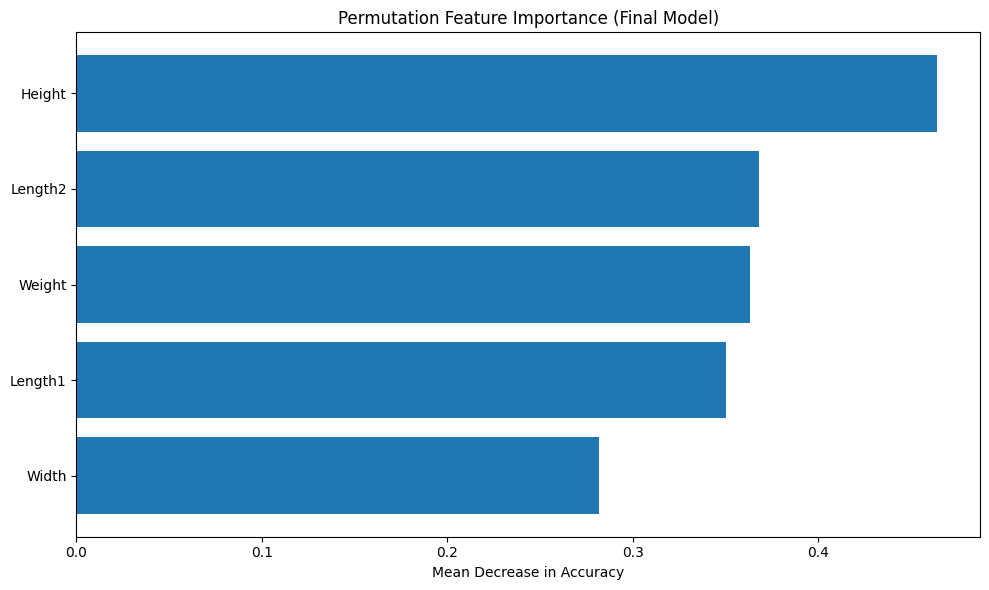

In [40]:
# Final model M is the best performing model from the grid search of A1
m = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=2, random_state=42)
m.fit(X_train, y_train)

result_m_acc = permutation_importance(m, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)

sorted_idx = result_m_acc.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result_m_acc.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.xlabel("Mean Decrease in Accuracy")
plt.title("Permutation Feature Importance (Final Model)")
plt.tight_layout()
plt.show()


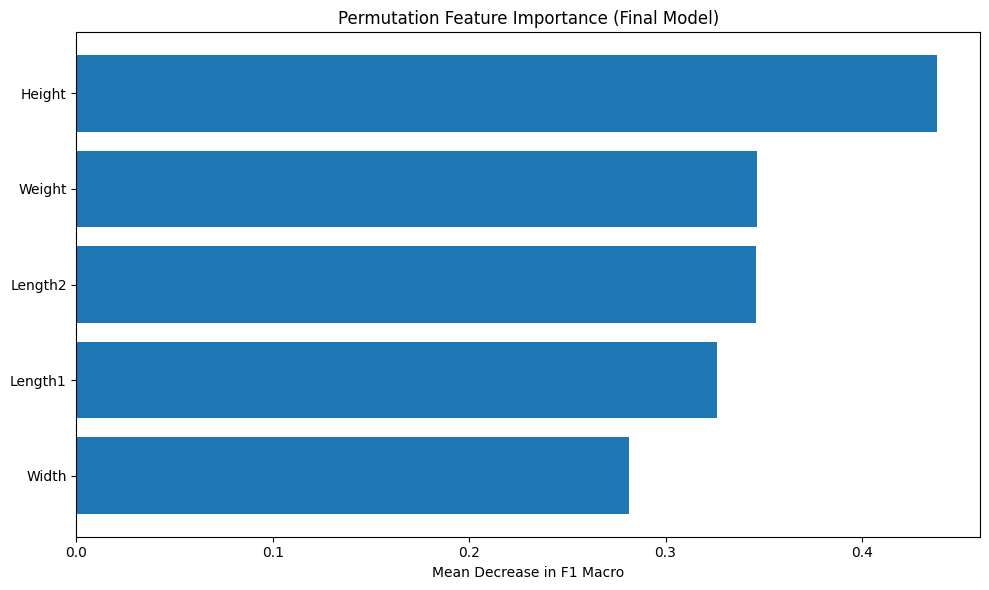

In [41]:
result_m_f1 = permutation_importance(m, X_test, y_test, scoring='f1_macro', n_repeats=10, random_state=42)

sorted_idx = result_m_f1.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result_m_f1.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.xlabel("Mean Decrease in F1 Macro")
plt.title("Permutation Feature Importance (Final Model)")
plt.tight_layout()
plt.show()

<div class='alert alert-block alert-info'>
<h2 style='font-size: 18px; font-weight: bold'>Feature Permutation</h2>

* According to the measure of mean decrease in accuracy/F1 macro, we can see that they follow similar trend.
* The only changes are between `Weight` and `Length2`, but the changes are minimal.
* Through this, we can conclude that the `Height` being the **most important feature**, followed up by **Length2** and **Weight**.

<h2 style='font-size: 18px; font-weight: bold'>Feature Ablation Study</h2>

* On the other hand, the two least important features are $F1$ = `Length1` and $F2$ = `Width` for both scores.

</div>

In [42]:
# Helper function to create pipeline for the ablation study
# This function will create a pipeline that drops specified columns before fitting the model
def make_pipeline(drop_cols):
    return Pipeline([
        ('feature_dropper', FunctionTransformer(lambda data: data.drop(columns=drop_cols), validate=False)),
        ('classifier', m) # Final model M
    ])

def evaluate_pipeline(pipeline, X, y, cv):
    acc_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
    f1_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1_macro')
    return acc_scores.mean(), f1_scores.mean()

In [43]:
# Feature sets to drop
drop_F1 = ['Length1']
drop_F2 = ['Width']
drop_both = ['Length1', 'Width']

In [44]:
# Baseline (no feature dropped)
baseline_pipeline = make_pipeline([])
acc_all, f1_all = evaluate_pipeline(baseline_pipeline, X, y, outer_cv)

# Drop F1 only
f1_pipeline = make_pipeline(drop_F1)
acc_f1, f1_f1 = evaluate_pipeline(f1_pipeline, X, y, outer_cv)

# Drop F2 only
f2_pipeline = make_pipeline(drop_F2)
acc_f2, f1_f2 = evaluate_pipeline(f2_pipeline, X, y, outer_cv)

# Drop F1 and F2
both_pipeline = make_pipeline(drop_both)
acc_both, f1_both = evaluate_pipeline(both_pipeline, X, y, outer_cv)

In [45]:
results_ablation = pd.DataFrame({
    'Feature Set': [
        'All Features',
        'Without Length1 (F1)',
        'Without Width (F2)',
        'Without Length1 & Width (F1+F2)'
    ],
    'Accuracy': [acc_all, acc_f1, acc_f2, acc_both],
    'F1 Macro': [f1_all, f1_f1, f1_f2, f1_both]
})

results_ablation

,Feature Set,Accuracy,F1 Macro
0,All Features,0.964505,0.964481
1,Without Length1 (F1),0.932085,0.931794
2,Without Width (F2),0.919227,0.919628
3,Without Length1 & Width (F1+F2),0.853268,0.854084


* Here we see the mean decrease in accuracy being the lowest for `Length1` and `Width`.

<div class='alert alert-block alert-danger'>
<h2 style='font-size: 18px; font-weight: bold'>Ablation Study Evaluation</h2>

**Removing One Feature**
* Removing $F1$ ncauses a noticeable drop in both metrics (~3.2%).

* Removing $F2$ causes a slightly larger drop (~4.5%).

* Both features contribute to model performance, with $F2$ contributing slightly more.

**Removing Both Features**

* Accuracy and F1 drop sharply to ~85.3–85.4%.

* The two features are not **redundant**. Removing both affects the model cumulatively and significantly.

* This confirms that even less "important" features by permutation can still play a **synergistic role** when removed together.

**Conclusion**
* This reinforces the value of: (1) Combining **feature importance** (permutation) with (2) Empirical **testing** (ablation).
* The final model $M$ should keep **all the features** to maximise performance.

</div>

<div class='alert alert-block alert-warning'>
<h1 style='font-size: 25px; font-weight: bold'>Task 8 - Conclusion and Future Work</h2>
</div>

<div class="alert alert-block alert-info">
<h2 style='font-size: 18px; font-weight: bold'>Summary & Interpretation </h2>

* The **Random Forest Classifier ($A1$)** was chosen as the final model **$M$**, due to its outstanding performance in outer cross-validation in Task 6.

* The model demonstrated strong predictive capability, achieving **96.45% in both accuracy and F1 Macro Score**, confirming its ability to reliably classify fish species with balanced precision and recall.

**Key Findings**

**1. Feature Importance Analysis (Permutation-Based)**

* The most influential features were `Height`, `Weight`, and `Length2`, as shuffling them significantly degraded model performance.

* `Length1` and `Width` had the least individual impact when permuted, suggesting lower importance.

**2. Ablation Study Insights**

* Removing `Length1` or `Width` alone caused a modest drop (~3–4%) in accuracy and F1, indicating they still contribute some predictive value.

* However, removing both simultaneously led to a drastic decline (85.33% accuracy, 85.41% F1), revealing a synergistic effect, while individually less critical, together they enhance model performance.

<div class="alert alert-block alert-info">
<h2 style='font-size: 18px; font-weight: bold'> Generated Value Explanation </h2>

* The **permutation importance analysis** provided an initial ranking of feature relevance, but the **ablation study** demonstrated that even features with lower individual importance can collectively improve model robustness. This underscores the importance of:

1. Combining interpretability methods (e.g. permutation importance) with empirical validation (e.g. ablation tests).

2. Retaining all features for optimal performance, as their combined contribution outweighs their isolated effects.

Therefore, the final model **𝑀 (Random Forest)** effectively leverages all available features, ensuring high accuracy and generalisation for fish species classification, that is of a mutli-class, not binary, with a very high accuracy and F1 Macro Score, as compared to the $A2$ and $B$ baseline model, at an outperforming accuracy/F1 macro at **96.45%**.

<div class="alert alert-block alert-info">
<h2 style='font-size: 18px; font-weight: bold'> Propose Ideas for Future Work </h2>

**Other Algorithms**
* In this experiment, I did not select other algorithms such as **SVM (Support Vector Machines)** or gradient boosting method like **XGBoost**.
* **SVM** is especially effective in high-dimensional spaces, which is good for morphological fish measurements like `Length1-3`, `Height`, etc.
* It works well with clear margin separation between classes, which is the case in this **multi-class problem**.
* This however, may require scaling, so adding another preprocessing step, which may not be suitable at the end, since it involves more steps.
* Also, the **hyperparameter-tuned AdaBoost algorithm** showed very interesting results as compared to its simple 5-fold cross-validation results.
* This algorithm can therefore be selected and be further analysed and may show different results, and it will be as good as Random Forest with hyperparameter tuning, that was chosen at the end.
* Or, it could be enhanced with **XGBoost** gradient boosting algorithm for this multi-class problem.

**Random Forest Tuning**
* Nevertheless, random forest with hyperparameters tuning had the best results, and we can try to improve the results further.
* I could test deeper trees (`max_depth=30` or `None`) + larger `n_estimators` (e.g., `300–500`).
* I could also optimise `min_samples_split` and `min_samples_leaf` to reduce overfitting.

**Feature Engineering**
* Feature Interactions: Create ratios (e.g., Length3/Height) or polynomial features.
* Dimensionality Reduction: Use PCA to check if fewer features preserve separability.
* Ablation Study: Remove the least important features (Length1, Width) and retrain to validate their necessity.

**Dataset Quality**
* Personally, I felt that there were some issues with the dataset, especially with the Smelt species.
* Therefore, I would like to get a better dataset of quality and with greater number of species, it would also be more challenging for the classification task, which will have a different consequence with a different approach of algorithm selection.

<div class="alert alert-block alert-info">
<h2 style='font-size: 18px; font-weight: bold'> Critical Reflection & Assessment on Usability </h2>

**1. Usability in Context**
* The goal was to classify fish species using morphological measurements (`Length1-3, Height, Width, Weight`). The applied methodology (Random Forest + nested CV with hyperparameters) was appropriate for tabular data and achieved a very good **96.45%** accuracy, meeting the problem’s requirements.
* However, some aspects could be questioned:
* **Real-World Usability:** High accuracy suggests the model is deployable, but were all fish species equally represented?  
Are measurements in production data as clean as the training set?

**2. Limitations and Pitfalls**  

* **Feature Sensitivity:** The model relies heavily on Length3/Height (permutation importance). If these measurements are noisy in practice, performance may drop.
* **Small Dataset?:** If the dataset had few samples per species (<50), the reported accuracy might not generalise.  
Although it was not the case in this dataset, it could be the case in the actual dataset where only few samples can be found for specific species.
* **Class Imbalance:** In relation to small dataset, some species could be rare, and the F1 macro score could mask poor performance for minority classes.  

**3. Evaluation Gaps**
* **No External Validation:** The test set might not represent real-world variability (e.g. different fish populations, measurement tools).
* **Confusion Matrix Omission:** While F1 was reported, per-class errors weren’t analyzed (e.g. which species are most confused).

However, with all these aside, I also feel that the accuracy/F1 Macro score of 96.45% is very high and usable, considering we had this dataset.  
It might of course not be the real best outcome, but this is a very good result, considering the goal of the task, that can surely be used already with smaller amount of species for less variation, which is usually the case for trawlers, since they catch fishes of similar kind in the sea, not different ones.

<h2 style='font-size: 18px; font-weight: bold'> Improvements </h2>

* Check for class imbalance, feature correlations, and outliers.
* Visualise pairwise feature relationships (e.g. scatterplots with species labels).
* Choice of SVM as A2 for a better comparison that features scaling, it could have had a better result than Random Forest.